In [1]:
from fastai.vision import *

In [9]:
whale = Path('../data')

In [10]:
whale_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [11]:
whale_train_csv = pd.read_csv(whale/'train.csv')

In [12]:
whale_train_csv.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [13]:
data = (ImageItemList.from_csv(whale, 'train.csv', folder='train')
        .random_split_by_pct()
        .label_from_df(label_delim=' ')
        .transform(whale_tfms, size=128)
        .databunch()
        .normalize(imagenet_stats))

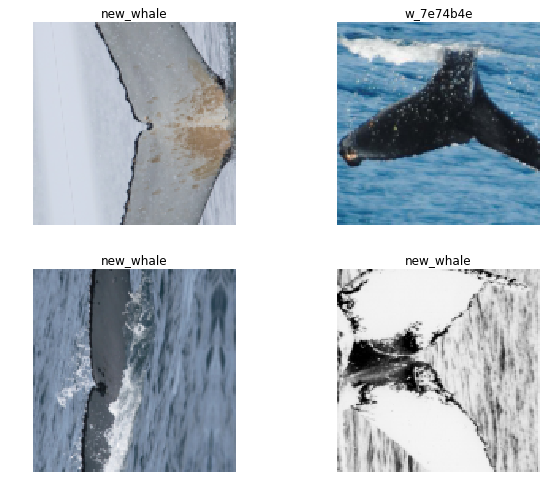

In [14]:
data.show_batch(rows=2, figsize=(9,7))

In [15]:
learn = create_cnn(data, models.resnet18)
learn.fit_one_cycle(5,1e-2)
learn.save('mini_train')

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/ubuntu/.torch/models/resnet18-5c106cde.pth
46827520it [00:00, 65293630.05it/s]


epoch,train_loss,valid_loss
1,0.009833,0.001384
2,0.001609,0.001283
3,0.001484,0.001186
4,0.001374,0.001118
5,0.001298,0.001101
